In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [12]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [14]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()[0]
print(recent_date)

2017-08-23


Text(0, 0.5, 'Precipitation')

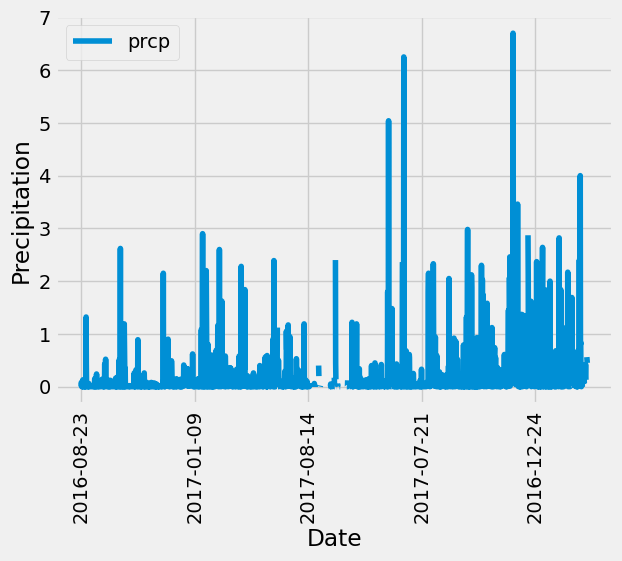

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_str = session.query(measurements.date).order_by(measurements.date.desc()).first()[0]
# Convert the string to a datetime object
recent_date = pd.to_datetime(recent_date_str)
# Calculate the date one year from the last date in data set.
last_12months_date = recent_date - dt.timedelta(days=365)

last_12months_date_str = last_12months_date.strftime('%Y-%m-%d')
recent_date_str = recent_date.strftime('%Y-%m-%d')

#print(recent_date)
#print(last_12months_date)
#print(recent_date_str)
#print(last_12months_date_str)

# Perform a query to retrieve the data and precipitation scores
prcp_12months=session.query(measurements.date, measurements.prcp).\
   filter(measurements.date >= last_12months_date_str).\
   filter(measurements.date <= recent_date_str).all()
 #  group_by(func.strftime("%m",measurements.date)).all()

#filter(func.strftime("%d", Dow.date) == date_str#

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_prcp_12months = pd.DataFrame(prcp_12months, columns=["date", "prcp"])

# Sort the dataframe by date
df_prcp_12months_sorted = df_prcp_12months.sort_values(by="date")
#print(df_prcp_12months)
# Use Pandas Plotting with Matplotlib to plot the data
#plt.figure(figsize=(20, 20))  # Set the figure size
df_results = pd.DataFrame(results,columns=["date","prcp"])
df_results.sort_values("date")

df_results.plot(x="date",y="prcp",rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")



In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
summ_stat = df_prcp_12months_sorted.describe()
print(summ_stat)

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
#total_stations = 
session.query(func.count(stations.station)).all()
#print(total_stations)

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurements.station,func.count().label("Active Stations")).\
    group_by(measurements.station).\
    order_by(func.count().desc()).all()
  

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(measurements.station).\
    group_by(measurements.station).\
    order_by(func.count().desc()).first()
#print(active_station)
active_station_stats = session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).\
                            filter(measurements.station == 'USC00519281').first()
print(active_station_stats)

(54.0, 85.0, 71.66378066378067)


2016-08-18 00:00:00


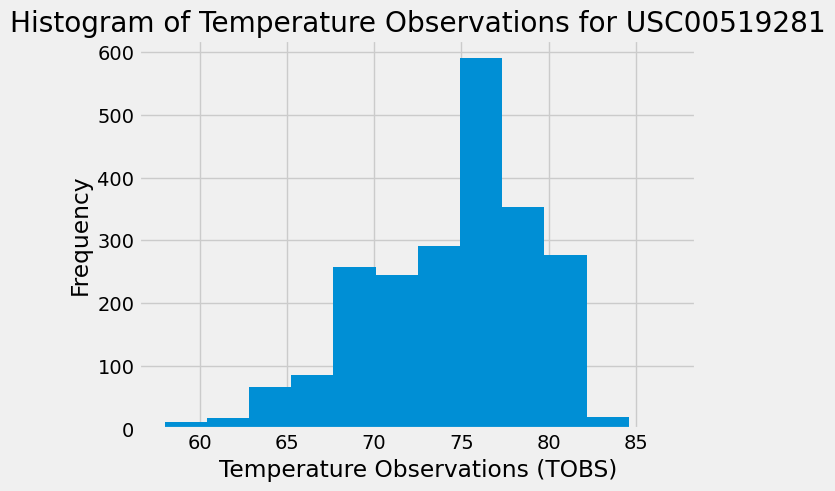

In [42]:
# Using the most active station id
last_date_str = session.query(measurements.date).\
                order_by(measurements.date.desc()).\
                filter(measurements.station == 'USC00519281').first()[0]
last_date = pd.to_datetime(last_date_str)
last_12_month_date = last_date - dt.timedelta(days=365)
print(last_12_month_date)
last_date_str = last_date.strftime('%Y-%m-%d')
last_12_month_date_str = last_12_month_date.strftime('%Y-%m-%d')
# Query the last 12 months of temperature observation data for this station 
temp_12months=session.query(measurements.date, measurements.tobs).\
   filter(measurements.date >= last_12months_date_str).\
   filter(measurements.date <= last_date_str).all()
df_tobs_12months = pd.DataFrame(temp_12months, columns=["date","tobs"])
df_tobs_12months.head()
#plot the results as a histogram
plt.hist(df_tobs_12months['tobs'], bins=12)
plt.xlabel('Temperature Observations (TOBS)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Observations for USC00519281')
plt.show()

# Close Session

In [45]:
# Close Session
session.close()